# Modelling the recovery process using probability

Recall code from last time for $I_{n+1} = (1 + c) I_n = \lambda * I_n$:

In [1]:
function run_infection(I_0, λ, T=20)  # T=20 is default value

    I = zeros(T)
    I[1] = I_0

    for n in 1:T-1
        I[n+1] = λ * I[n]  
    end

    return I
end

run_infection (generic function with 2 methods)

In [2]:
run_infection(1.0, 1.1);

## Adding new data to extend a vector

In [3]:
v = [1.0]

1-element Array{Float64,1}:
 1.0

In [4]:
push!(v, 7.0)  # ! means: function `push!` modifies its first argument

2-element Array{Float64,1}:
 1.0
 7.0

In [5]:
length(v)

2

In [6]:
a = 1

v[3]

BoundsError: BoundsError: attempt to access 2-element Array{Float64,1} at index [3]

In [7]:
v

2-element Array{Float64,1}:
 1.0
 7.0

In [8]:
[v; 10]

3-element Array{Float64,1}:
  1.0
  7.0
 10.0

In [9]:
v

2-element Array{Float64,1}:
 1.0
 7.0

In [10]:
v2 = [v; 10]

3-element Array{Float64,1}:
  1.0
  7.0
 10.0

In [11]:
v2 = copy(v)

2-element Array{Float64,1}:
 1.0
 7.0

In [12]:
function run_infection(I_0, λ, T=20)  # T=20 is default value

    Is = [I_0]
    
    I = I_0   # current value of I

    for n in 1:T-1
        I_next = λ * I
        
        push!(Is, I_next)
    end

    return Is
end

run_infection (generic function with 2 methods)

In [13]:
run_infection(1.0, 1.1)

20-element Array{Float64,1}:
 1.0
 1.1
 1.1
 1.1
 1.1
 1.1
 1.1
 1.1
 1.1
 1.1
 1.1
 1.1
 1.1
 1.1
 1.1
 1.1
 1.1
 1.1
 1.1
 1.1

In [14]:
function run_infection(I_0, λ, T=20)  # T=20 is default value

    Is = [I_0]
    I = I_0   # current value of I

    for n in 1:T-1
        I_next = λ * I
        
        push!(Is, I_next)
        
        I = I_next
    end
    
    return Is
end

run_infection (generic function with 2 methods)

In [15]:
run_infection(1.0, 1.1)

20-element Array{Float64,1}:
 1.0
 1.1
 1.2100000000000002
 1.3310000000000004
 1.4641000000000006
 1.6105100000000008
 1.771561000000001
 1.9487171000000014
 2.1435888100000016
 2.357947691000002
 2.5937424601000023
 2.853116706110003
 3.1384283767210035
 3.4522712143931042
 3.797498335832415
 4.177248169415656
 4.594972986357222
 5.054470284992944
 5.559917313492239
 6.115909044841463

In [16]:
v

2-element Array{Float64,1}:
 1.0
 7.0

In [17]:
pushfirst!(v, 8)   # deque - double-ended queue

3-element Array{Float64,1}:
 8.0
 1.0
 7.0

## Randomness

In [18]:
r = rand()

0.690924467988113

In [19]:
r = rand()

0.6442110952860238

In [20]:
using Random

In [21]:
Random.seed!(3);

In [22]:
r = rand()

0.8116984049958615

In [23]:
r = rand()

0.9884323655013432

In [24]:
Random.seed!(3);  # mechanism to get repeatable sequences of random numbers

In [25]:
r = rand()

0.8116984049958615

In [26]:
r = rand()

0.9884323655013432

In [27]:
rand(10)

10-element Array{Float64,1}:
 0.8076220876500786
 0.9700908450487538
 0.14006111319509862
 0.5094438024440222
 0.05869740597593154
 0.004257960600515309
 0.9746379934512355
 0.5572251384524507
 0.4644219211852372
 0.2875090558291695

In [28]:
using Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


In [29]:
r = rand(50);

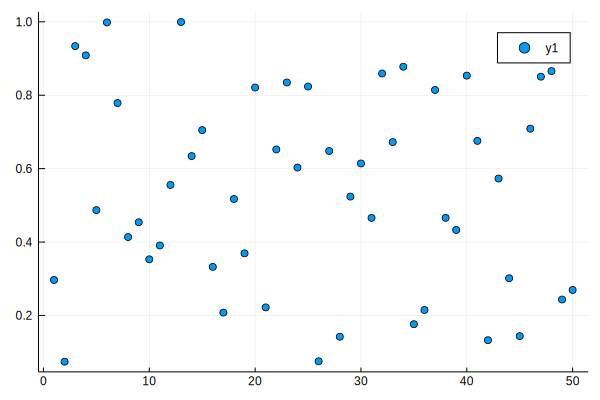

In [30]:
scatter(r)

In [31]:
one(0.5)

1.0

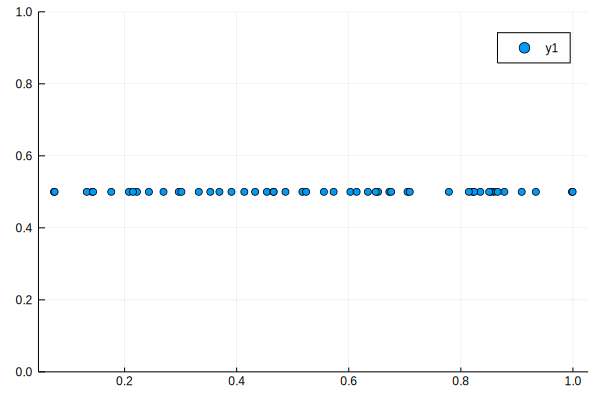

In [32]:
scatter(r, 0.5 .* one.(r), ylim=(0, 1))

In [33]:
using Interact

num_points = 100
r = rand(num_points)

@manipulate for n in 1:num_points
    scatter(r[1:n], 0.5 .* one.(r[1:n]), ylim=(0, 1), xlim=(0, 1))
end

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-7533192509917262111\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-12738976794612515772\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-7533192509917262111\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["n"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 100,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
50, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "C:\\Users\\chuan\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\chuan\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\chuan\\.julia\\packages\\InteractBase\\9mFwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\chuan\\.julia\\packages\\InteractBase\\9mFwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\chuan\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000016a14b90, Task (runnable) @0x0000000016a14b90), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",

## Event with probability $p$

In [34]:
p = 0.25
r = rand()

if r < p
    true
else
    false
end

false

"Bernoulli trial"

In [35]:
function bernoulli(p)

    r = rand()

    if r < p
        return true
    else
        return false
    end
end

bernoulli (generic function with 1 method)

In [36]:
r < p ? true : false   # ternary operator

false

In [37]:
r < p

false

In [38]:
function bernoulli(p)

    r = rand()

    return r < p
end

bernoulli (generic function with 1 method)

In [39]:
p = 0.25
trials = [bernoulli(p) for i in 1:100];


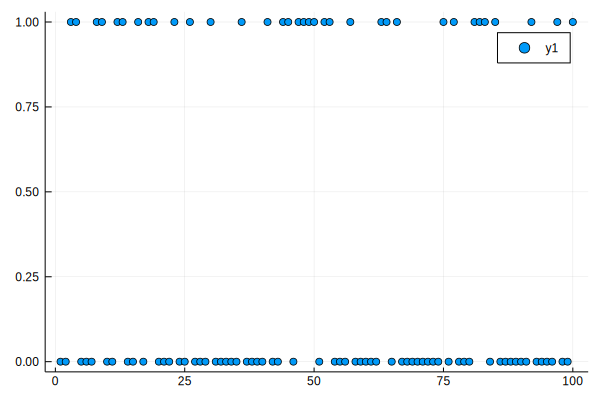

In [40]:
scatter(trials)

In [41]:
count(trials)

35

In [42]:
trials = [bernoulli(p) for i in 1:100];
count(trials)

28

In [43]:
trials = [bernoulli(p) for i in 1:100];
count(trials)

28

In [44]:
function bernoulli_experiment(p, N=100)
    trials = [bernoulli(p) for i in 1:N];
    return count(trials)
end

bernoulli_experiment (generic function with 2 methods)

In [45]:
count(trials .== false) + count(trials)

100

In [46]:
count(.!(trials))  # ! is not

72

In [47]:
bernoulli_experiment(0.25)

23

In [48]:
bernoulli_experiment(0.25)

22

A function which has different **outcomes** in different runs is called a **random variable**

## Monte Carlo simulation

Run the same random process a lot of times and look at the results

In [49]:
p = 0.25
N = 20   # num of trials
num_expts = 100 

results = [bernoulli_experiment(p, N) for i in 1:num_expts]

100-element Array{Int64,1}:
 5
 5
 6
 7
 3
 4
 2
 8
 4
 6
 5
 4
 5
 ⋮
 7
 6
 7
 6
 6
 7
 4
 7
 2
 5
 5
 6

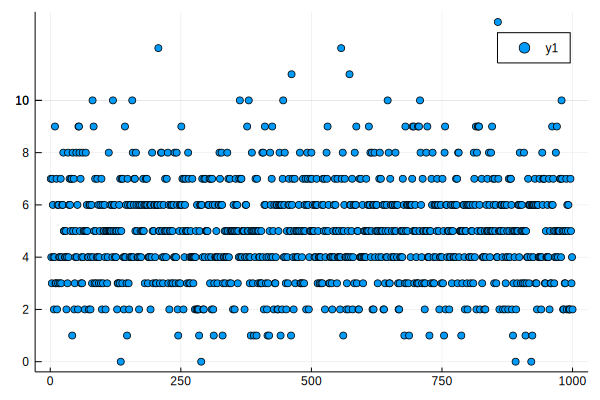

In [50]:
num_expts = 1000
results = [bernoulli_experiment(p, N) for i in 1:num_expts]
scatter(results)

$X$ = number of heads

**Probability distribution** of a random variable $X$

$\text{Prob}(X = x)$

Probability that $X = x$ = proportion of time that the result was $x$

## Counting

Need to count how many of the trials come out as 5

Need data structure where we store the counts:
- `Dict` (dictionary)
- `Vector`

In [51]:
results

1000-element Array{Int64,1}:
 7
 4
 3
 7
 6
 4
 2
 4
 9
 3
 3
 7
 2
 ⋮
 2
 6
 5
 6
 2
 2
 2
 7
 5
 3
 4
 2

In [52]:
maximum(results)   # not `max`:   max(1, 2, 3)

13

In [53]:
minimum(results)

0

In [54]:
l = maximum(results) + 1  # +1 is to store 0

14

In [55]:
counts = zeros(l);

In [56]:
for score in results[1:10]   # for i in 1:length(results)
    @show score
end

score = 7
score = 4
score = 3
score = 7
score = 6
score = 4
score = 2
score = 4
score = 9
score = 3


In [57]:
for score in results
    counts[score + 1] += 1   # increment by 1
end

In [58]:
counts

14-element Array{Float64,1}:
   4.0
  22.0
  80.0
 125.0
 191.0
 206.0
 182.0
  98.0
  52.0
  26.0
   9.0
   2.0
   2.0
   1.0

In [59]:
counts = zeros(Int, maximum(results) + 1)

for score in results
    counts[score + 1] += 1   # increment by 1
end

In [60]:
counts

14-element Array{Int64,1}:
   4
  22
  80
 125
 191
 206
 182
  98
  52
  26
   9
   2
   2
   1

In [61]:
]add LaTeXStrings

   Updating registry at `C:\Users\chuan\.julia\registries\General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


Fetching: [========================================>]  100.0 %==>                                      ]  3.3 % [===>                                     ]  7.2 %.4 %=======>                                 ]  16.7 %0 %Fetching: [==========>                              ]  23.7 % [===========>                             ]  26.0 % [============>                            ]  29.9 % [================>                        ]  38.4 % [==================>                      ]  44.3 %Fetching: [====================>                    ]  49.7 %.6 %.4 %==========================>              ]  64.9 %.1 % [==============================>          ]  73.2 %]  78.8 % [==================================>      ]  83.3 %Fetching: [===================================>     ]  85.8 % [=====================================>   ]  90.1 %]  93.2 %96.3 %

  Resolving package versions...
  Installed ZeroMQ_jll ─ v4.3.2+2
   Updating `C:\Users\chuan\.julia\environments\v1.4\Project.toml`
 [no changes]
   Updating `C:\Users\chuan\.julia\environments\v1.4\Manifest.toml`
  [8f1865be] ↑ ZeroMQ_jll v4.3.2+1 ⇒ v4.3.2+2


In [85]:
using LaTeXStrings

plot(0:maximum(results), counts, m=:o)
ylabel!(L"Frequency of n heads")
xlabel!(L"n")

latex: failed to create a dvi file
latex: failed to create a dvi file
latex: failed to create a dvi file
latex: failed to create a dvi file
latex: failed to create a dvi file
latex: failed to create a dvi file
latex: failed to create a dvi file
latex: failed to create a dvi file


BoundsError: BoundsError: attempt to access 14-element Array{Float64,1} at index [1:15]

In [63]:
function count_them(results)

    counts = zeros(Int, maximum(results) + 1)

    for score in results
        counts[score + 1] += 1   # increment by 1
    end
    
    return counts
end

count_them (generic function with 1 method)

In [64]:
function run_experiments(p, N, num_expts=1000)
    results = [bernoulli_experiment(p, N) for i in 1:num_expts]
end

run_experiments (generic function with 2 methods)

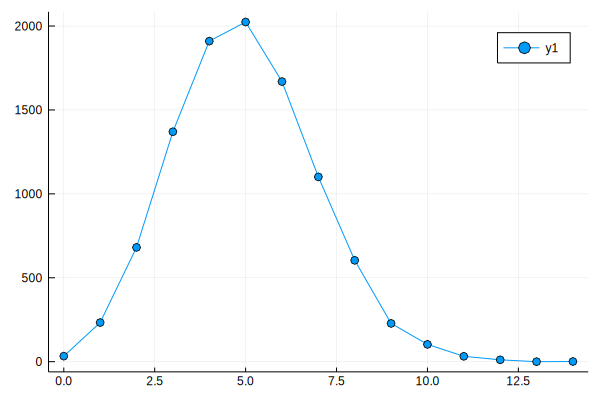

In [65]:
data = count_them(run_experiments(0.25, 20, 10000))
plot(0:length(data)-1, data, m=:o)

## Probability distribution

Probability = relative frequency

Divide by the number of experiments:

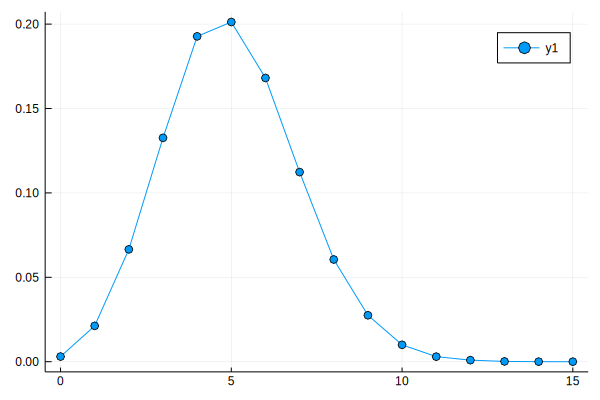

In [66]:
data = count_them(run_experiments(0.25, 20, 10^5))

plot(0:length(data)-1, data ./ sum(data), m=:o)

In [67]:
@time data = count_them(run_experiments(0.25, 20, 10^5))


  0.048467 seconds (100.00 k allocations: 11.444 MiB)


16-element Array{Int64,1}:
   321
  2021
  6766
 13575
 19153
 20342
 16815
 10974
  5893
  2692
  1038
   312
    74
    18
     4
     2

In [68]:
@time data = count_them(run_experiments(0.25, 20, 10^6))

  0.620881 seconds (1.00 M allocations: 114.441 MiB, 5.16% gc time)


16-element Array{Int64,1}:
   3142
  21226
  67471
 133734
 189365
 202833
 167820
 112298
  61297
  27030
   9914
   2949
    734
    160
     24
      3

In [69]:
@time data = count_them(run_experiments(0.25, 20, 10^7))

  5.981003 seconds (10.00 M allocations: 1.118 GiB, 9.39% gc time)


17-element Array{Int64,1}:
   31511
  210847
  670736
 1337263
 1898631
 2023329
 1684689
 1125562
  609651
  269615
   98857
   30047
    7410
    1563
     262
      26
       1

In [70]:
num_expts = 10^5
data = count_them(run_experiments(0.25, 20, num_expts))

probs = data ./ num_expts

16-element Array{Float64,1}:
 0.00357
 0.02114
 0.06627
 0.13318
 0.19031
 0.20108
 0.16884
 0.114
 0.06099
 0.02731
 0.00974
 0.00271
 0.00072
 9.0e-5
 4.0e-5
 1.0e-5

In [71]:
sum(probs)

1.0000000000000002

In [72]:
x = 3 // 4

3//4

In [73]:
typeof(x)

Rational{Int64}

In [74]:
x + x

3//2

In [75]:
probs = data .// num_expts

16-element Array{Rational{Int64},1}:
   357//100000
  1057//50000
  6627//100000
  6659//50000
 19031//100000
  5027//25000
  4221//25000
    57//500
  6099//100000
  2731//100000
   487//50000
   271//100000
     9//12500
     9//100000
     1//25000
     1//100000

In [76]:
sum(probs)

1//1

In [77]:
data

16-element Array{Int64,1}:
   357
  2114
  6627
 13318
 19031
 20108
 16884
 11400
  6099
  2731
   974
   271
    72
     9
     4
     1

In [78]:
mean(data)

UndefVarError: UndefVarError: mean not defined

In [79]:
using Statistics

In [80]:
results = run_experiments(0.25, 20, 10^5);

In [81]:
mean(results)  # N=20 trials, p=0.25   

5.00227

Expected mean value = N * p